# <font color = Blue>Image Duplication and Image Blending</font>

# 1. Image Duplication

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv  # import opencv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [2]:
# download image from the URL
!wget "https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg" -O messi5.jpg

--2023-04-09 17:43:54--  https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  71.23K  --.-KB/s    in 0.01s   

2023-04-09 17:43:54 (5.50 MB/s) - ‘messi5.jpg’ saved [72937/72937]



In [3]:
!ls -l

total 108
-rw-r--r-- 1 root root 72937 Apr  9 17:43 messi5.jpg
-rw-r--r-- 1 root root 30128 Oct 27  2013 opencv_logo.png
drwxr-xr-x 1 root root  4096 Apr  6 13:39 sample_data


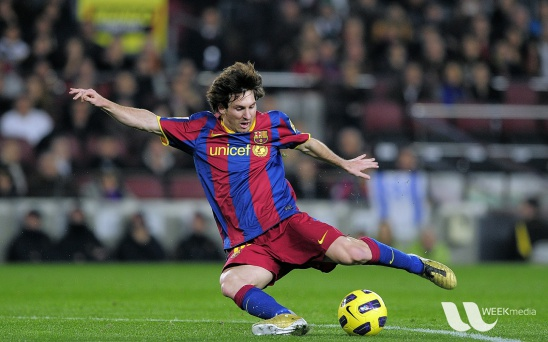

In [4]:
img1 = cv.imread('messi5.jpg')  
cv2_imshow(img1)

In [5]:
print(img1.shape)

(342, 548, 3)


## Size of the image
Hight of the image - 342 pixel hight of the image, 542 pixel width and for each pixel we have 3 colors - this colors have a range from 0-255.

In [6]:
print(img1[100,100])

[157 166 200]


## Duplication of Object

In [7]:
ball = img1[280:340, 330:390]

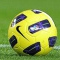

In [8]:
cv2_imshow(ball)

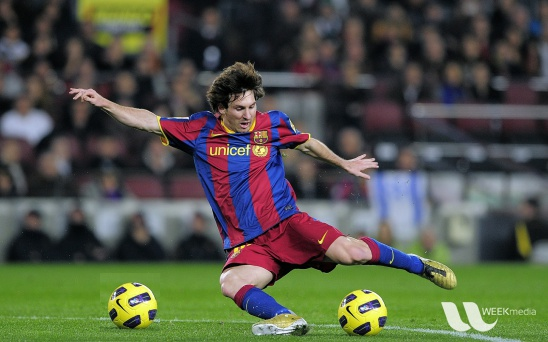

In [9]:
img1[273:333, 100:160] = ball
cv2_imshow(img1)

## In above cell the process that is happening is as follow
## We are taking the ball from the picture and trying to duplicate it, for this we took the pixel values where the ball was present and the place where we need to duplicate the ball, and added the ball to this duplicate place.

## There are many different things that we can do using Image processing, the simple process how an Image is represented by a computer depends on two factors:
1. Zoom in till you see individual pixels.
2. Get the values for pixel of R,G and B

# 2. Image Blending

## In this technique what we will display is How can we blend two different images together.

Step 1 - Get the Second Image, first image is the football player

In [10]:
# downlaod another image opencv_logo
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png -O opencv_logo.png

--2023-04-09 17:43:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30128 (29K) [image/png]
Saving to: ‘opencv_logo.png’

opencv_logo.png     100%[===================>]  29.42K  --.-KB/s    in 0.02s   

2023-04-09 17:43:55 (1.39 MB/s) - ‘opencv_logo.png’ saved [30128/30128]



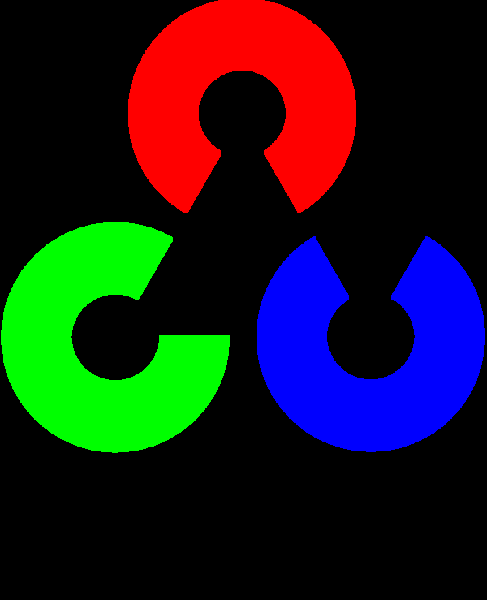

In [11]:
img2 = cv.imread('opencv_logo.png')
cv2_imshow(img2)

In [12]:
print(img2.shape)

(600, 487, 3)


## Image Blending Technique
1. Both Images should be of same size
2. The mathematical formula for Image blending is (1-α)*pixel1 + α*pixel2
where pixel1 pixel of Image1 and pxel2 is pixel of Image2, **this is called Weighted Average**.

(342, 548, 3)


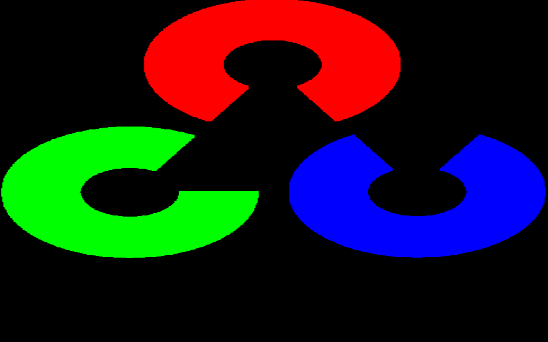

In [13]:
img2a = cv.resize(img2, (548, 342)) # resizing opencv logo to be the same size as messi
print(img2a.shape)
cv2_imshow(img2a)

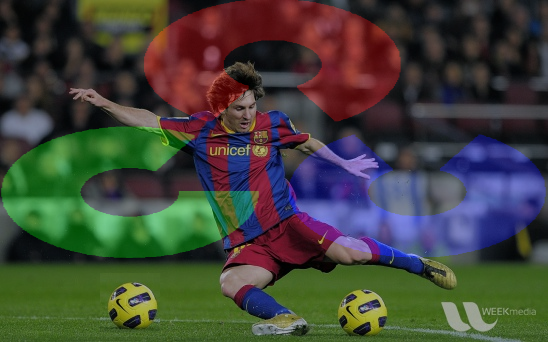

In [14]:
# Refer to documentation: https://docs.opencv.org/master/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19
dst = cv.addWeighted(img1,0.7,img2a,0.3,0)
cv2_imshow(dst)

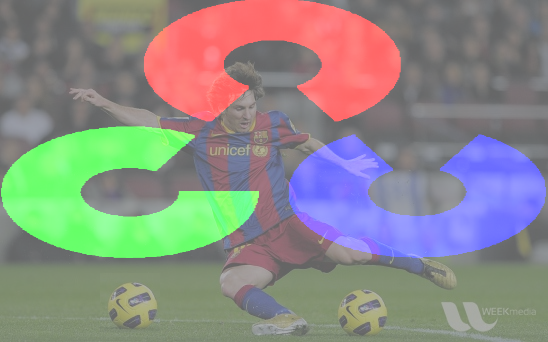

In [15]:
dst = cv.addWeighted(img1,0.3,img2a,0.7,100)
cv2_imshow(dst)

## As we change the weight of images the Output of the Image changes, In first Image messie image has more weight and in second image logo image has more weightage.

## 3. Image Difference

In [22]:
img = cv.imread('messi5.jpg')  

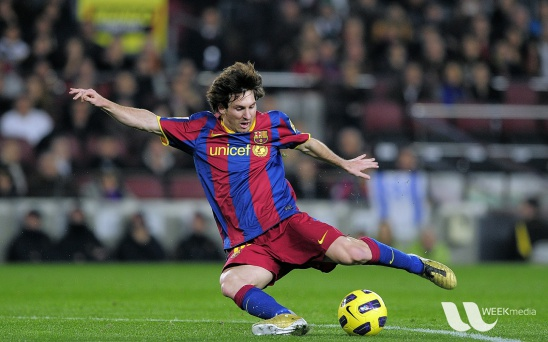

In [20]:
image1 = img
cv2_imshow(image1)

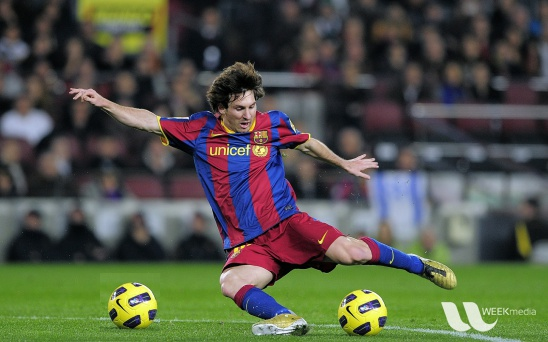

In [21]:
image2 = img1
cv2_imshow(image2)

In [24]:
#img = cv2.imread(image1)
img_gray1= cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
img_gray2= cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

In [26]:
difference = cv.subtract(image2 , image1)

In [27]:
result = not np.any(difference) ## if difference is all zeroes it will return false 

In [29]:
if result is True:
    print ("The image are the same")
else:
    cv.imwrite("result.jpg", difference)
    cv.imwrite("orignal.jpg", image2)

    print ("the images are different")

the images are different
